In [2]:
# fmt: off
%pylab inline
%load_ext autoreload
import pyvista as pv
from IPython.display import display, clear_output
import mmf_setup; mmf_setup.nbinit()
#mpl.rcParams["figure.dpi"] = 600
from pyvista.utilities import xvfb
xvfb.start_xvfb()
# fmt: on

<IPython.core.display.Javascript object>

# Visualizing Caustics

Here we make 3D visualizations of the structure behind the caustics.  We plot $t-t_f$, where

$$
  t_f(z) = \sqrt{\frac{2z}{a}}
$$

is the free-fall time, as a function of position $(z, x)$ showing the evolving sheet with folds that give rise to the caustics.

In [3]:
%autoreload
from catastrophe_atom_optics import Experiment

# List keys corresponding to figures
Experiment.paper_Vs

{'fig1': [GaussianV(epsilon=0.966516, q=-85j, sigma=10.3),
  GaussianV(epsilon=0.646881, q=(39-127j), sigma=10.3)],
 'fig3a': [GaussianV(epsilon= 0.3, q=-78j, sigma=11.3)],
 'fig3b': [GaussianV(epsilon= 0.9, q=-78j, sigma=11.3)],
 'fig3c': [GaussianV(epsilon=0.99, q=-78j, sigma=11.3)],
 'fig3d': [GaussianV(epsilon= 1.4, q=-78j, sigma=11.3)],
 'fig3e': [GaussianV(epsilon=-0.1, q=-46j, sigma=27.0)],
 'fig3f': [GaussianV(epsilon=-0.3, q=-46j, sigma=27.0)],
 'fig3g': [GaussianV(epsilon=-0.9, q=-46j, sigma=27.0)],
 'fig3h': [GaussianV(epsilon=-1.8, q=-46j, sigma=27.0)],
 'fig4a': [GaussianV(epsilon= 0.9, q=-78j, sigma=11.3)],
 'fig4e': [GaussianV(epsilon= 0.9, q=-78j, sigma=11.3)],
 'fig4b': [GaussianV(epsilon= 1.4, q=-78j, sigma=11.3)],
 'fig4f': [GaussianV(epsilon= 1.4, q=-78j, sigma=11.3)],
 'fig4c': [GaussianV(epsilon=-0.3, q=-46j, sigma=27.0)],
 'fig4g': [GaussianV(epsilon=-0.3, q=-46j, sigma=27.0)],
 'fig4d': [GaussianV(epsilon=-1.8, q=-46j, sigma=27.0)],
 'fig4h': [GaussianV(epsilon=

In [4]:
e = Experiment("fig1")
# You can choose different figures like this:
# e = Experiment("fig3a")
sol0, sol = e.get_dense_sol()

First we plot the trajectories:

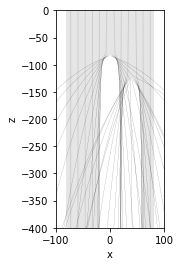

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(sol0.q.real, sol0.q.imag, '-k', lw='0.1')
ax.set(aspect=1, xlabel='x', ylabel='z', xlim=(-100,100), ylim=(-400, 0));

Now we can plot the 3D visualizations using the following code, which makes use of [PyVista](https://docs.pyvista.org/):

In [6]:
from contextlib import contextmanager
from catastrophe_atom_optics import Experiment

@contextmanager
def task(msg):
    display(msg + "...")
    yield
    clear_output(wait=True)
    display(msg + ". Done.")

_sol_cache = {}

def draw(key="fig1", sol=None, t_fact=1.0, t_skip=10, interactive=True, subtract_t0=True,
         pvargs={}, export_vtkjs=False):
    """Display the 3D surface."""
    experiment = Experiment(key)
    global _sol_cache
    if sol is None:
        if key not in _sol_cache:
            with task(f"Solving {key} for trajectories"):
                sol = experiment.get_dense_sol()[-1]
            _sol_cache[key] = sol
        else:
            display(f"Using _sol_cache[{key}]")
            sol = _sol_cache[key]

    t, q, v = sol.t, sol.q, sol.v
    x, z = q.real, q.imag
    t0 = np.sqrt(2*(q/experiment.a).real)
    if not subtract_t0:
        t0 = 0*t0
    
    # Scale t so that aspect ratios are about the equal.
    t_ = t[:, np.newaxis] - t0
    t_scale = np.where(experiment.z_min < z, abs(t_), 0).max()
    t_ *= abs(experiment.z_min) / t_scale
    surf = pv.StructuredGrid(z, x, t_*t_fact)

    if export_vtkjs:
        with task(f"Exporting to {key}.vtkjs"):
            pl = pv.Plotter()
            pl.add_mesh(surf, opacity=0.5)
            pl.export_vtkjs(key)
        return pl
        
    if interactive:
        pl = pv.PlotterITK()
        pl.add_mesh(surf, color='white', opacity=0.5)
        pl.show(parallel_projection=True)
        return pl
    else:
        kw = dict(notebook=True, parallel_projection=True, opacity=0.5)
        pvres = pv.plot(surf, **kw)

'Solving fig1 for trajectories. Done.'

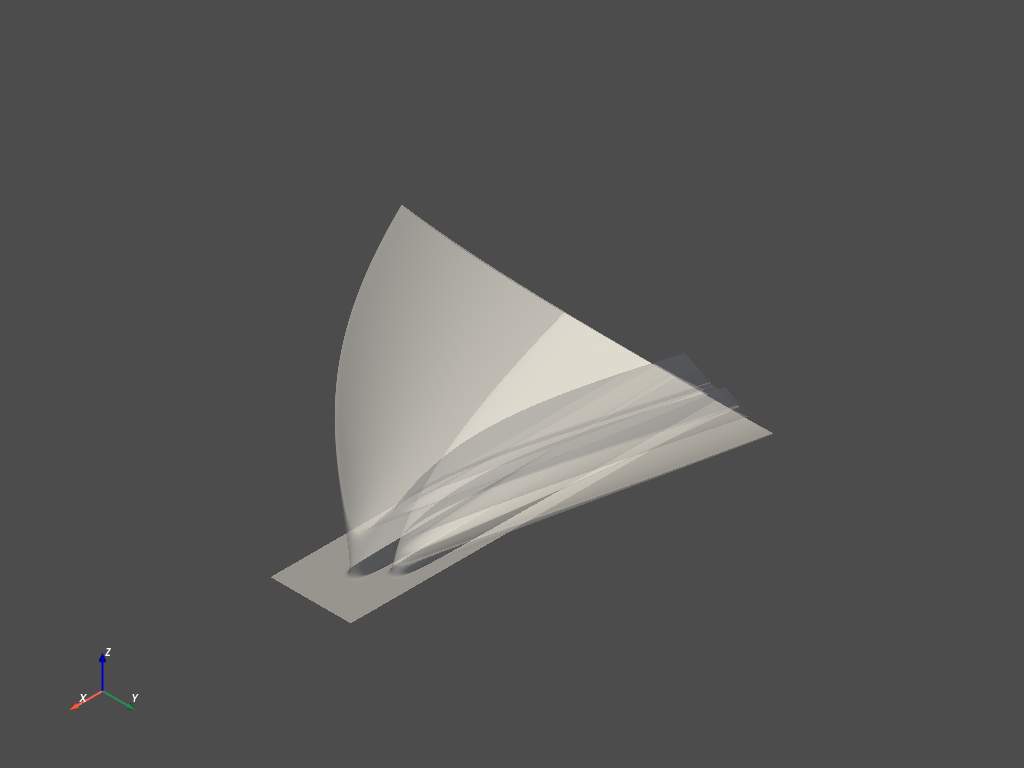

In [7]:
# Non-interactive code.  Looks nicer with opacity etc.
pl = draw("fig1", interactive=False)

In [ ]:
# Non-interactive code. Not so nice, but interactive!
# https://github.com/pyvista/pyvista-support/issues/276
pl = draw("fig1", interactive=True)

# General VTKjs Files

Here we run through all figures and generate VTKjs files that can be used to view these models offline by running them through [viewer.pyvista.org](https://viewer.pyvista.org) or [kitware.github.io](https://kitware.github.io/vtk-js/examples/SceneExplorer/index.html):

* Two repulsive potentials: [Fig.1](https://viewer.pyvista.org/?fileURL=https://swan.physics.wsu.edu/Public/papers/Mossman_2021/fig1.vtkjs)
* Single repulsive Gaussian potential: [Fig.3a](https://viewer.pyvista.org/?fileURL=https://swan.physics.wsu.edu/Public/papers/Mossman_2021/fig3a.vtkjs), [Fig.3b](https://viewer.pyvista.org/?fileURL=https://swan.physics.wsu.edu/Public/papers/Mossman_2021/fig3b.vtkjs), [Fig.3c](https://viewer.pyvista.org/?fileURL=https://swan.physics.wsu.edu/Public/papers/Mossman_2021/fig3c.vtkjs), [Fig.3d](https://viewer.pyvista.org/?fileURL=https://swan.physics.wsu.edu/Public/papers/Mossman_2021/fig3d.vtkjs)
* Single attractive Gaussian potential: [Fig.3e](https://viewer.pyvista.org/?fileURL=https://swan.physics.wsu.edu/Public/papers/Mossman_2021/fig3e.vtkjs), [Fig.3f](https://viewer.pyvista.org/?fileURL=https://swan.physics.wsu.edu/Public/papers/Mossman_2021/fig3f.vtkjs), [Fig.3g](https://viewer.pyvista.org/?fileURL=https://swan.physics.wsu.edu/Public/papers/Mossman_2021/fig3g.vtkjs), [Fig.3h](https://viewer.pyvista.org/?fileURL=https://swan.physics.wsu.edu/Public/papers/Mossman_2021/fig3h.vtkjs).

In [ ]:
for key in Experiment.paper_Vs:
    if key.startswith("fig4"):
        # These are already done in fig3
        continue
    draw(key, export_vtkjs=True);